# Conexão com postgres e Relatorios do Sistema

relatorios:

grafico de barras viagens por motorista

grafico de pizza viagens por tipo de carro

grafico com pontos de saida de uma cor, pontos de chegada de outra cor

grafico linha viagens por dia

soma dos tempos de viagem

## Instalando bibliotecas de acesso ao postgres, manipulação de dados e gráficos

In [1]:
#!pip install --user psycopg2-binary
#!pip install --user seaborn
#!pip install --user pandas

### Importando bibliotecas

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

### Usando psycopg2 para configurar conexão

In [1]:
conn = psycopg2.connect(host="babar.db.elephantsql.com",database="wzhsebsm", user="wzhsebsm")

NameError: name 'psycopg2' is not defined

# Relatórios

## Relatório 1
### Objetivo: Saber quem são os motoristas com maior número de viagens assim como o número de viagens desses motoristas

In [50]:
relatorio1 = pd.read_sql_query("""
SELECT
    lp.nome AS motorista,
    COUNT(c.id) AS caronas
FROM login_pessoa lp
INNER JOIN veiculo v ON v.id_dono = lp.id
INNER JOIN carona c ON c.id_veiculo = v.id
GROUP BY motorista;
""",conn)
relatorio1

/tmp/ipykernel_30673/4417927.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  relatorio1 = pd.read_sql_query("""


,motorista,caronas
0,Elizabeth Woods,1
1,Eduardo Próspero,1
2,Susan Wagner,1
3,Jorge Sullivan,1
4,Peter Montgomery,3
5,Norma Fisher,2
6,Theodore Mcgrath,3


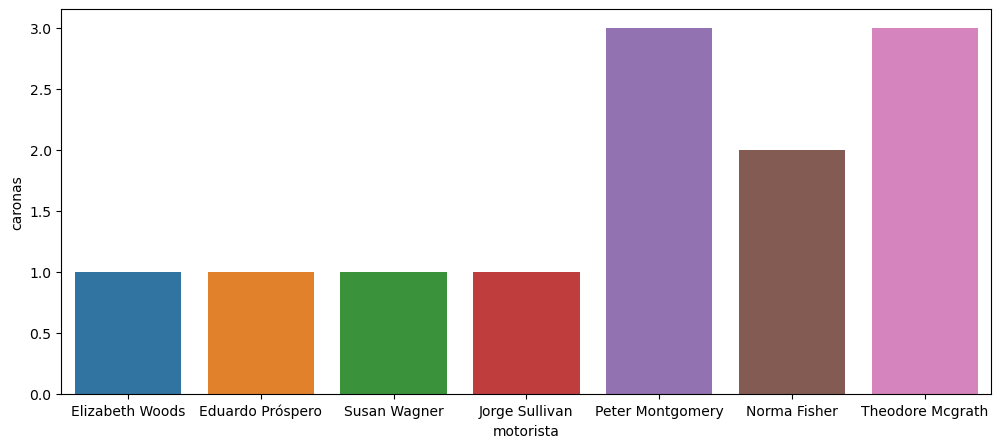

In [51]:
plt.figure(figsize = (12, 5))
sns.barplot(x='motorista', y='caronas', data=relatorio1)
plt.show()

# ==========================================================================================
## Relatório 2
### Objetivo: Conhecer os tipos de veículo mais e menos utilizados pelos usuários

In [12]:
relatorio2 = pd.read_sql_query("""
SELECT
    tv.descricao as "tipo de veiculo",
    COUNT(c.id) as "numero de caronas"
FROM carona c
INNER JOIN veiculo v ON c.id_veiculo = v.id
INNER JOIN tipo_veiculo tv ON v.id_tipo = tv.id
GROUP BY "tipo de veiculo";
""",conn)
relatorio2

/tmp/ipykernel_30673/1449503476.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  relatorio2 = pd.read_sql_query("""


,tipo de veiculo,numero de caronas
0,Carro dois assentos,4
1,Carro,4
2,Van,3
3,Motocicleta,1


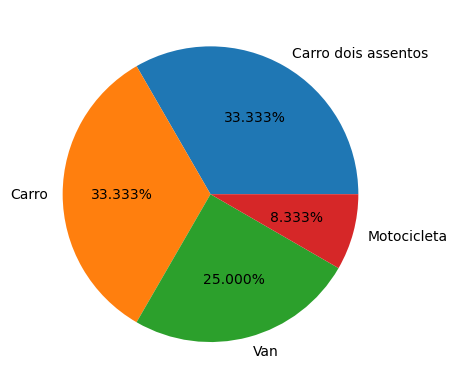

In [17]:
plt.pie(relatorio2['numero de caronas'], labels=relatorio2['tipo de veiculo'], autopct='%1.3f%%')
plt.show()

# ============================================================
## Relatório 3
### Objetivo: Identificar tendências em número de caronas ao longo do tempo

In [18]:
relatorio3 = pd.read_sql_query("""
SELECT DATE(horario_saida) AS dia, COUNT(*) AS "quantidade de viagens"
FROM carona
GROUP BY dia;
""",conn)
relatorio3

/tmp/ipykernel_30673/4168620541.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  relatorio3 = pd.read_sql_query("""


,dia,quantidade de viagens
0,2023-01-23,1
1,2023-02-04,2
2,2023-02-10,2
3,2023-02-05,1
4,2023-02-03,3
5,2023-02-02,1
6,2022-12-31,2


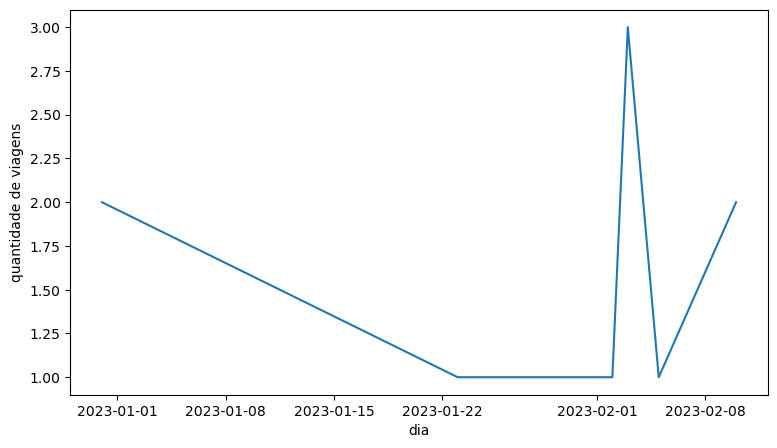

In [22]:
plt.figure(figsize=(9, 5))
sns.lineplot(data=relatorio3, x='dia', y='quantidade de viagens')
plt.show()

# ============================================================
## Relatório 4
### Objetivo: Identificar áreas com grande número de caronas feitas
Código para obtenção do resultado:

In [52]:
relatorio4 = pd.read_sql_query("""
SELECT
    local_saida,
    local_chegada
FROM carona
WHERE
    local_saida IS NOT NULL AND
    local_chegada IS NOT NULL;
""",conn)
relatorio4

/tmp/ipykernel_30673/2522089805.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  relatorio4 = pd.read_sql_query("""


,local_saida,local_chegada
0,"(1,0)","(1,1)"
1,"(-1,-1)","(0,0)"
2,"(-3,-2)","(-1,2)"
3,"(-2,0)","(2,5)"
4,"(1,1)","(1.2,8)"
5,"(2,-5)","(2,3)"
6,"(10,-10)","(0,0)"
7,"(7,-5)","(8,3)"
8,"(2,0)","(2,-3)"
9,"(-2,5)","(-20,-3)"


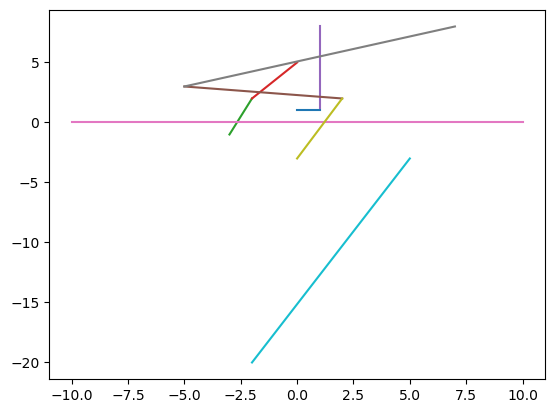

In [53]:
from ast import literal_eval
segmentos = relatorio4.values.tolist()
# literal_eval interpreta string como entrada para intepretador
segmentos = [[literal_eval(j) for j in i] for i in segmentos]
for seg in segmentos:
    plt.plot(seg[0], seg[1])
plt.show()

# ============================================================
## Relatório 5
### Objetivo: Obter em uma unidade simples uma intuição geral do uso do Pathfinder

In [49]:
relatorio5 = pd.read_sql_query("""
SELECT
    SUM(horario_chegada - horario_saida) AS tempo
FROM carona
WHERE
    horario_saida IS NOT NULL AND
    horario_chegada IS NOT NULL;
""",conn)
relatorio5

/tmp/ipykernel_30673/296228793.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  relatorio5 = pd.read_sql_query("""


,tempo
0,0 days 09:55:31.776970
